In [91]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns




In [92]:
df = pd.read_csv("Heart.csv")
print(df.head())

   Age Sex ChestPainType  RestingBP  FastingBS  MaxHR ExerciseAngina  Oldpeak  \
0   40   M           ATA      140.0          0    172              N      0.0   
1   49   F           NAP      160.0          0    156              N      1.0   
2   37   M           ATA      130.0          0     98              N      0.0   
3   48   F           ASY      138.0          0    108              Y      1.5   
4   54   M           NAP      150.0          0    122              N      0.0   

  ST_Slope  SmokingStatus HeartDisease  
0       Up              0       Normal  
1     Flat              1       Normal  
2       Up              0           ST  
3     Flat              1       Normal  
4       Up              0       Normal  


In [93]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,SmokingStatus,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,True,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False


In [94]:
df.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP         57
FastingBS          0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
SmokingStatus      0
HeartDisease       0
dtype: int64

In [95]:
imputer = SimpleImputer(strategy='median')
df["RestingBP"] = imputer.fit_transform(df[["RestingBP"]])

In [96]:
df["RestingBP"].isna().sum()

0

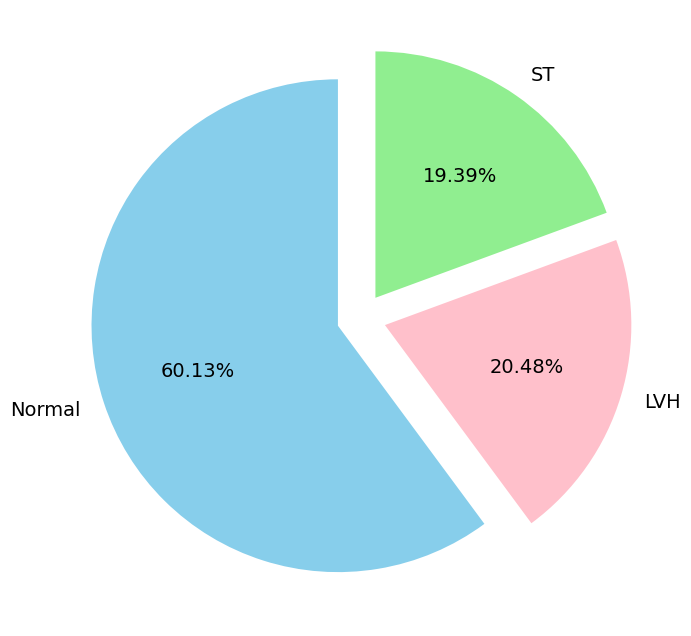

In [97]:
counts = df['HeartDisease'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', explode=[0.1, 0.1, 0.1], 
        colors=['skyblue', 'pink', 'lightgreen'], startangle=90, textprops={'fontsize': 14})
plt.show()

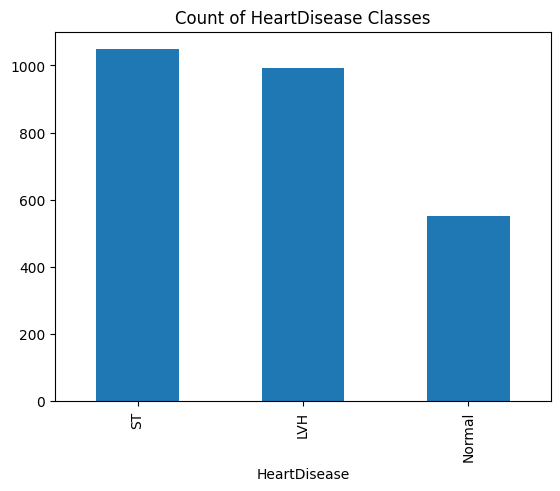

In [98]:
count_class_normal = df['HeartDisease'].value_counts()['Normal']
count_class_lvh = df['HeartDisease'].value_counts()['LVH']
count_class_st = df['HeartDisease'].value_counts()['ST']


df_normal = df[df['HeartDisease'] == 'Normal']
df_lvh = df[df['HeartDisease'] == 'LVH']
df_st = df[df['HeartDisease'] == 'ST']


df_lvh_upsampled = resample(df_lvh, 
                            replace=True, 
                            n_samples=int(count_class_normal * 1.8), 
                            random_state=42)

df_st_upsampled = resample(df_st, 
                           replace=True, 
                           n_samples=int(count_class_normal * 1.9),  
                           random_state=42)


df_upsampled = pd.concat([df_normal, df_lvh_upsampled, df_st_upsampled])


df_upsampled['HeartDisease'].value_counts().plot(kind='bar', title='Count of HeartDisease Classes')

plt.show()

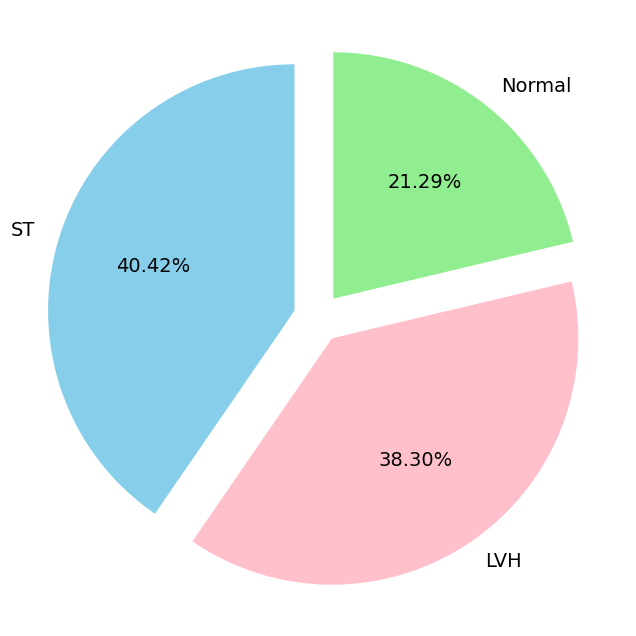

In [99]:
counts = df_upsampled['HeartDisease'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', explode=[0.1, 0.1, 0.1], 
        colors=['skyblue', 'pink', 'lightgreen'], startangle=90, textprops={'fontsize': 14})
plt.show()

In [100]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [101]:
df["HeartDisease"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [102]:
mapping = {'Flat': 1, 'Down': 2,'Up':0}

df_upsampled['ST_Slope'] = df_upsampled['ST_Slope'].map(mapping)

In [103]:
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,SmokingStatus,HeartDisease
0,40,M,ATA,140.0,0,172,N,0.0,Up,0,Normal
1,49,F,NAP,160.0,0,156,N,1.0,Flat,1,Normal
2,37,M,ATA,130.0,0,98,N,0.0,Up,0,ST
3,48,F,ASY,138.0,0,108,Y,1.5,Flat,1,Normal
4,54,M,NAP,150.0,0,122,N,0.0,Up,0,Normal


In [104]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [105]:
df["HeartDisease"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [106]:
mapping = {'ASY': 0, 'ATA': 1,'NAP':2,'TA':3}

df_upsampled['ChestPainType'] = df_upsampled['ChestPainType'].map(mapping)

In [107]:
mapping = {'N': 0, 'Y': 1}

df_upsampled['ExerciseAngina'] = df_upsampled['ExerciseAngina'].map(mapping)

In [108]:
mapping = {'Normal': 0, 'ST': 1,'LVH':2}

df_upsampled['HeartDisease'] = df_upsampled['HeartDisease'].map(mapping)

In [109]:
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,SmokingStatus,HeartDisease
0,40,M,ATA,140.0,0,172,N,0.0,Up,0,Normal
1,49,F,NAP,160.0,0,156,N,1.0,Flat,1,Normal
2,37,M,ATA,130.0,0,98,N,0.0,Up,0,ST
3,48,F,ASY,138.0,0,108,Y,1.5,Flat,1,Normal
4,54,M,NAP,150.0,0,122,N,0.0,Up,0,Normal


In [110]:
encoder = ce.OneHotEncoder(cols=['Sex'], use_cat_names=True)

In [111]:
df_encoded=encoder.fit_transform(df_upsampled)

In [112]:
df_encoded

,Age,Sex_M,Sex_F,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,SmokingStatus,HeartDisease
0,40,1,0,1,140.0,0,172,0,0.0,0,0,0
1,49,0,1,2,160.0,0,156,0,1.0,1,1,0
3,48,0,1,0,138.0,0,108,1,1.5,1,1,0
4,54,1,0,2,150.0,0,122,0,0.0,0,0,0
5,39,1,0,2,120.0,0,170,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,64,1,0,0,120.0,1,106,0,2.0,1,1,1
565,61,1,0,0,141.0,0,115,1,1.7,1,1,1
154,41,1,0,1,120.0,0,160,0,0.0,0,0,1
419,55,1,0,0,142.0,0,149,1,2.5,0,1,1


In [113]:
X = df_encoded.iloc[:, :-1].values  
Y = df_encoded.iloc[:, -1].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [116]:
classifier = LogisticRegression(random_state=42)


In [117]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [118]:
y_pred = classifier.predict(X_test_scaled)
y_pred_train=classifier.predict(X_train_scaled)

In [119]:
df_encoded

,Age,Sex_M,Sex_F,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,SmokingStatus,HeartDisease
0,40,1,0,1,140.0,0,172,0,0.0,0,0,0
1,49,0,1,2,160.0,0,156,0,1.0,1,1,0
3,48,0,1,0,138.0,0,108,1,1.5,1,1,0
4,54,1,0,2,150.0,0,122,0,0.0,0,0,0
5,39,1,0,2,120.0,0,170,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,64,1,0,0,120.0,1,106,0,2.0,1,1,1
565,61,1,0,0,141.0,0,115,1,1.7,1,1,1
154,41,1,0,1,120.0,0,160,0,0.0,0,0,1
419,55,1,0,0,142.0,0,149,1,2.5,0,1,1


In [120]:
X.shape


(2593, 11)

In [121]:
print(classifier.predict(scaler.transform([[30, 1, 0, 1, 120, 0, 140, 1, 1, 1, 0]])))


[0]


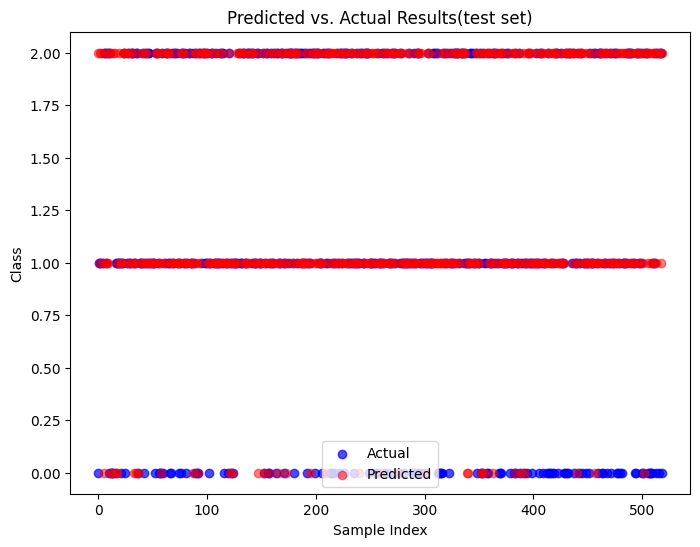

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.5)
plt.title('Predicted vs. Actual Results(test set)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

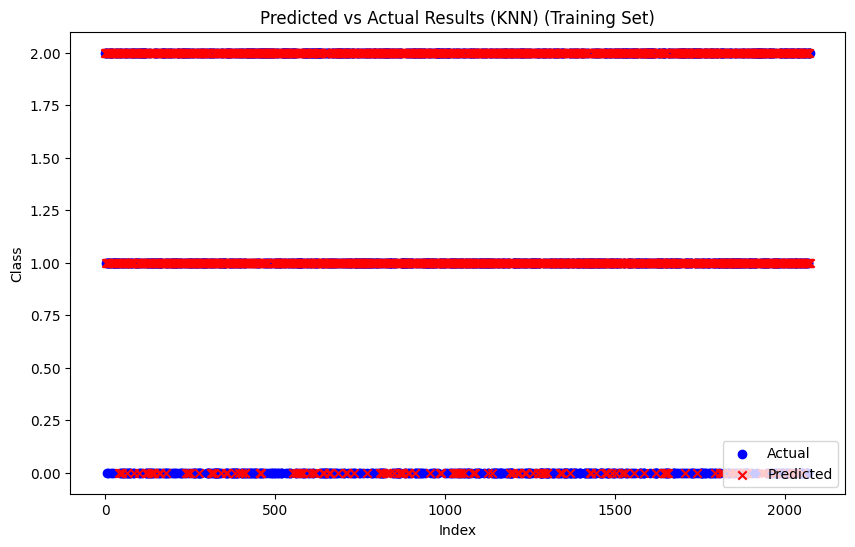

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, label='Actual', color='blue', marker='o')
plt.scatter(range(len(y_pred_train)), y_pred_train, label='Predicted', color='red', marker='x')
plt.title('Predicted vs Actual Results (KNN) (Training Set)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()


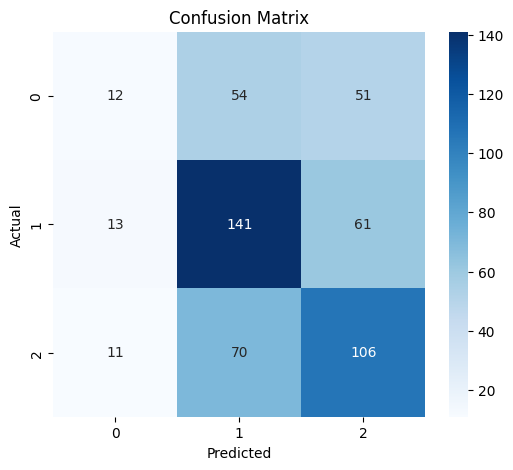

In [124]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [125]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.50


In [126]:
# print(classification_report(y_test, y_pred))


KNN

In [127]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)

In [128]:
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=2)

In [129]:
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred=knn_classifier.predict(X_train_scaled)


In [130]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn)

KNN Model Accuracy: 0.8554913294797688


In [131]:
print(knn_classifier.predict(scaler.transform([[30, 1, 0, 1, 120, 0, 140, 1, 1, 1, 0]])))


[0]


In [132]:
df = pd.DataFrame({ 'y_actual': y_test, 'y_pred': y_pred_knn})
df.head(20)


,y_actual,y_pred
0,0,2
1,1,1
2,1,2
3,1,1
4,1,1
5,2,2
6,2,2
7,1,1
8,2,2
9,2,2


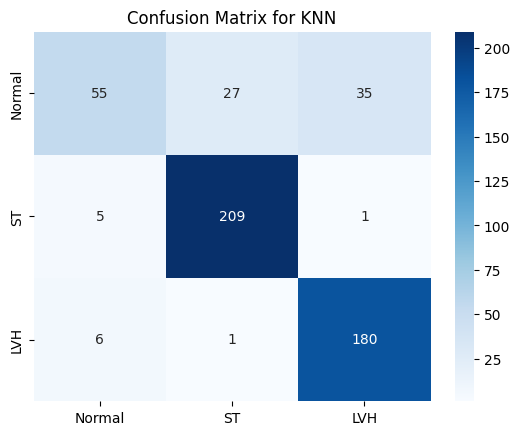

In [133]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'ST', 'LVH'], yticklabels=['Normal', 'ST', 'LVH'])
plt.title('Confusion Matrix for KNN')
plt.show()


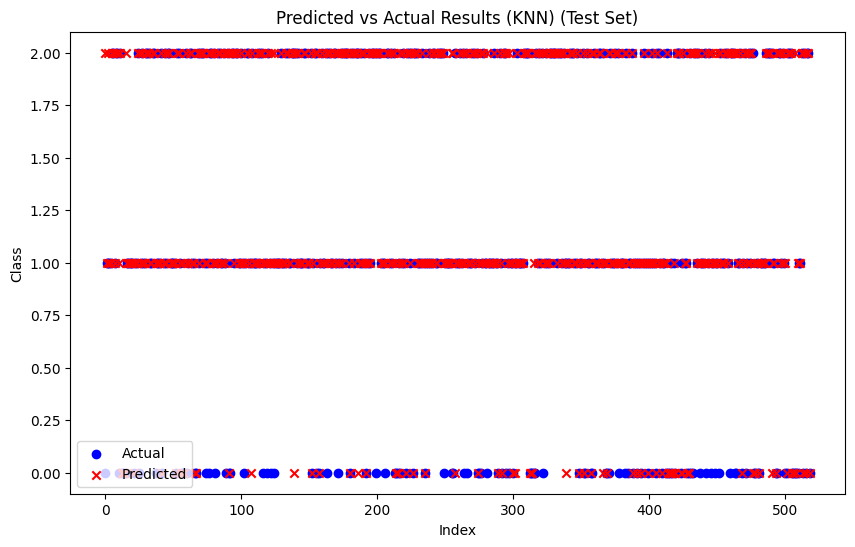

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, label='Predicted', color='red', marker='x')
plt.title('Predicted vs Actual Results (KNN) (Test Set)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()


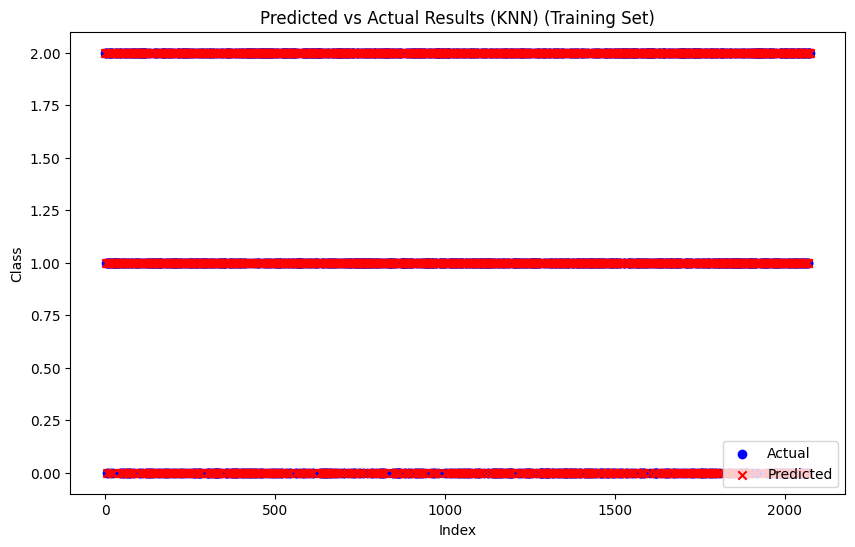

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, label='Actual', color='blue', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.title('Predicted vs Actual Results (KNN) (Training Set)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()
